In [1]:
########
# Veri seti ile ilgili bilgiler:
# 1. Veri seti 150 adet örnekten oluşmaktadır.
# 2. Her bir örnek 9 adet özellikten oluşmaktadır.
# bu özellikler sırasıyla: 

#boylam(latitute), 
# enlem(longitude),
#konut_ort_yas(housing_median_age),
#toplam_oda_sayısı(total_rooms),
#toplam_yatak_sayısı(total_bedrooms),
#nüfus(population),
#hane_sayısı(households),
#medyan_gelir(median_income),
#medyan_ev_değeri(median_house_value),
#okyanusa_yakınlık(ocean_proximity) gibi özelliklerden oluşmaktadır.

# medyan ev geliri tahmin edilmek istenmektedir.




In [2]:
import pandas as pd
import numpy as np

In [3]:
housing = pd.read_csv ('housing.csv')
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#veri seti ile ilgili bilgilere bakıldığında:
# RangeIndex ile toplanda 20640 adet veri bulunmaktadır
# sadece total_bedrooms özelliginde 7 adet eksik veri bulunmaktadır.
# ocean_proximity özelligi object türündedir. !

In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
#ocean_proximity özelligindeki verilerin dağılımı:
#<1H OCEAN     9136 
#INLAND        6551
#NEAR OCEAN    2658
#NEAR BAY      2290
#ISLAND           5
#bunlar ocean_proximity özelligindeki verilerin dağılımıdır.

In [7]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


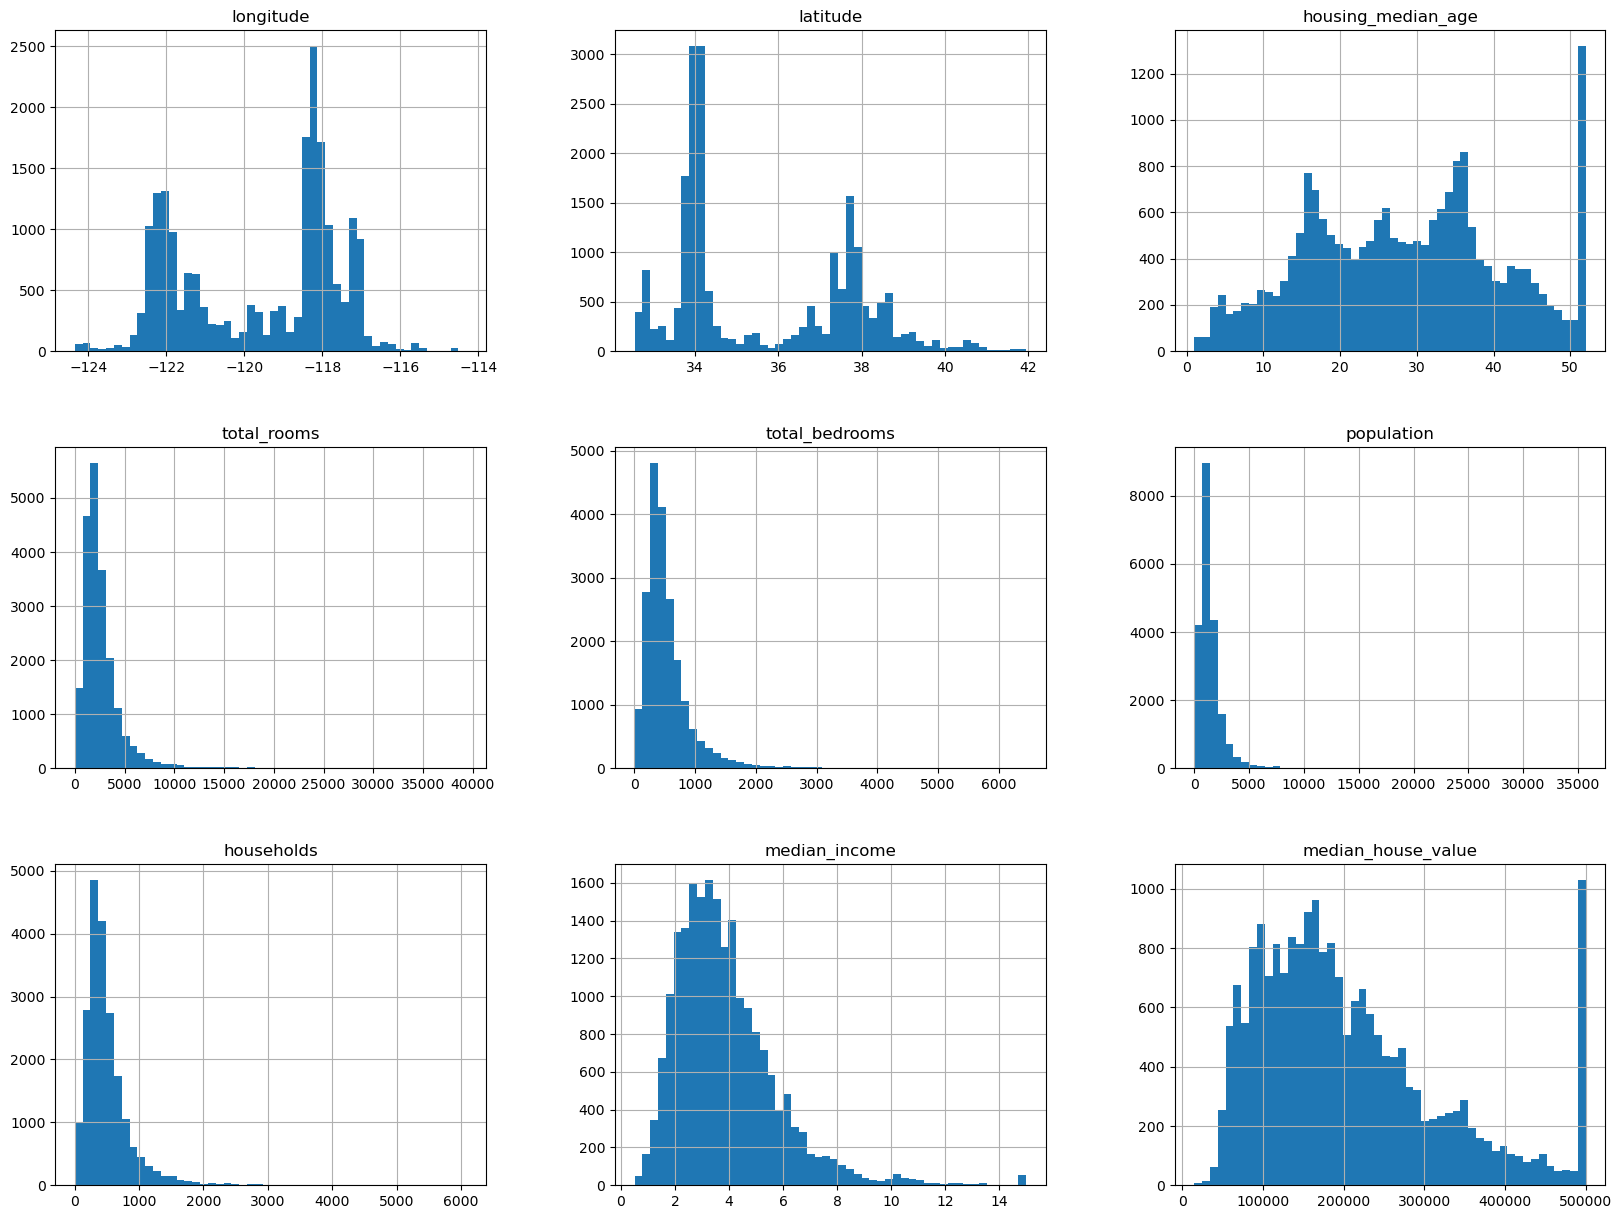

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins= 50, figsize= (20,15))
plt.show()
#bununla elde edilen grafik tüm sayısal özelliklerin histogramını göstermektedir. yani her bir özelliğin dağılımını göstermektedir.

In [9]:
#veri setinin histogramlarına bakıldığında:
#ortalama ev yaşı dağılımı normal dağılıma yakın bir dağılım göstermektedir bununla evlerin ortalama olarak benzer yaşta olduğu çıkmaktadır
#ortalama gelir ise 2-4 arasında yoğunlaşmaktadır
#ortalama ev değeri ise 5000 - 30.000 arasında yoğunlaşıyor 
# dikey çizgiler sınırlamayı ifade etmektedir yani ort ev değeri için ve ort ev yaşı değişkenleri sınırlandırılmıştır bu nedenle dik çizgiler elde edilmiş.

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


<Axes: >

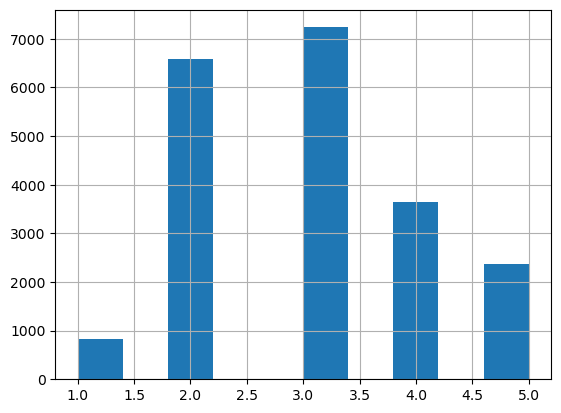

In [11]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

#burada median_income özelliği 5 kategoriye ayrılmıştır. ve bu kategorilerin dağılımı gösterilmiştir.
#bu kategorileriin oluşumunda 0-1.5 arasında olanlar 1, 1.5-3 arasında olanlar 2, 3-4.5 arasında olanlar 3, 4.5-6 arasında olanlar 4, 6 ve üzeri olanlar 5 olarak belirlenmiştir.
#bu kategorilerin oluşturulmasının amacı daha iyi bir test ve train seti oluşturmak içindir.
#tabakalı örnekleme yapılmasının amacı ise veri setindeki her bir kategoriden eşit sayıda örnek alınmasını sağlamaktır.
#bu sayede her bir kategoriye ait örneklerin eşit sayıda olmasını sağlamaktır.
#yani örnekleme yapılırken bu kategori ile ölçeklenmiş bir örnekleme yapılacaktır.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [13]:
#kategorilere ait test setinin oranlarına bakıldığında:
#1. kategoriye ait oran %0.039729
#2. kategoriye ait oran %0.318798
#3. kategoriye ait oran %0.350533
#4. kategoriye ait oran %0.176357
#5. kategoriye ait oran %0.114583 olarak belirlenmiştir.
#bu oranlar stratified örnekleme ile elde edilmiştir.
#bu oranlar ile orjinal veri setindeki oranlar karşılaştırıldığında oranların eşit olduğu görülmektedir.
#bu durum orjinal veri setindeki kategorilerin oranlarının korunduğunu göstermektedir.
#yani house income ile doğru orantılı bir ketegorileme yapılmıştır ve bu kategorilerin oranları korunanarak test ve train seti oluşturulmuştur.

In [14]:
### Veri Keşfi ve Görselleştirme

<Axes: xlabel='longitude', ylabel='latitude'>

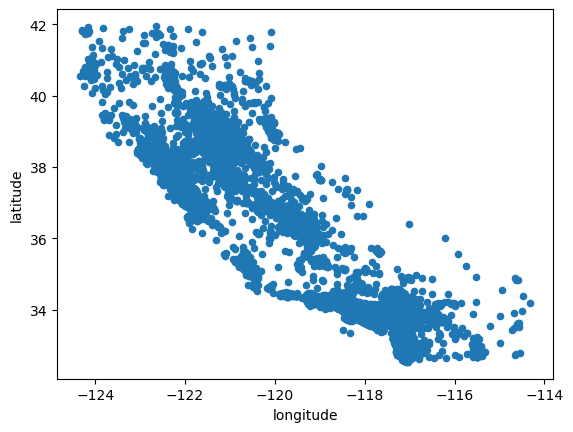

In [15]:
housing_copy = strat_train_set.copy() #train seti kopyalandı
housing_copy.plot(kind= 'scatter', x= 'longitude', y= 'latitude')


<Axes: xlabel='longitude', ylabel='latitude'>

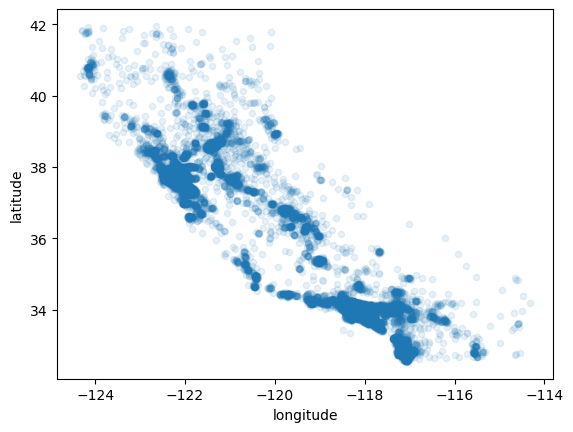

In [16]:
housing_copy = strat_train_set.copy()
housing_copy.plot(kind= 'scatter', x= 'longitude', y= 'latitude', alpha = 0.1)

In [17]:
#denize yakınlıkla ev fiyatları arasında bir paralellik var gibi gözüküyor. yani denize yakın olan evlerin fiyatları daha yüksek gibi gözüküyor.

<Axes: xlabel='longitude', ylabel='latitude'>

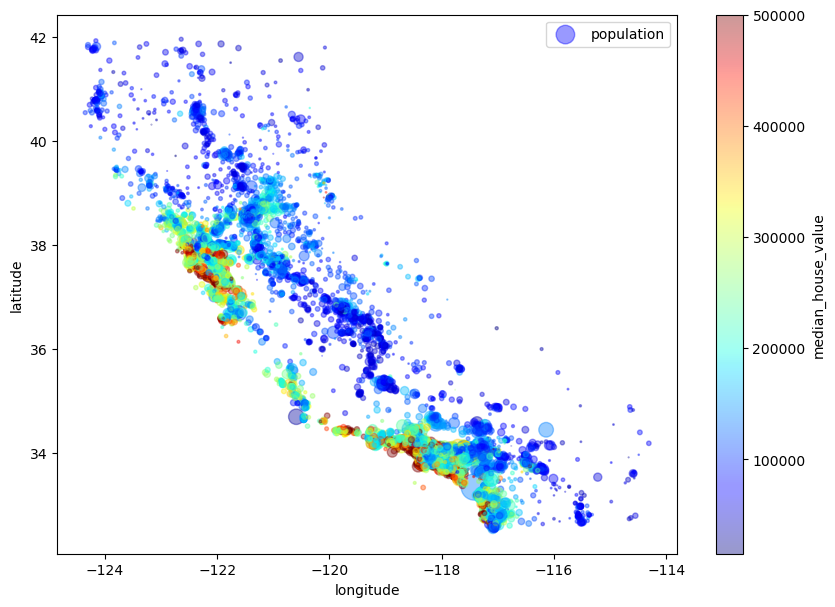

In [18]:
housing_copy.plot(kind= 'scatter', x= 'longitude', y= 'latitude', alpha = 0.4, s= housing_copy['population']/100, label= 'population', figsize= (10,7), c= 'median_house_value', cmap= plt.get_cmap('jet'), colorbar= True)

In [19]:
#grafiğe bakıldığında nüfus yoğunluğu ile ev fiyatları arasında bir ilişki olduğu görülmektedir. 
# #yani nüfus yoğunluğu arttıkça ev fiyatları artmaktadır.
#özellikle 118-116 enlem ve 32-36 boylam arasında ev fiyatları daha yüksek gibi gözükmektedir.
#bu bölgelerde nüfus yoğunluğu da daha fazla olduğu için ev fiyatlarının daha yüksek olduğu görülmektedir.
#ayrıca denize yakın olan evlerin fiyatları daha yüksek gibi gözükmektedir.

In [20]:
#ÖNEMLİ ; CORELASYON HESAPLAMA YAPARKEN KATEGORİK DEĞİŞKENLERİN DEĞERLERİNİN SAYISAL DEĞERLERE DÖNÜŞTÜRÜLMESİ GEREKMEKTEDİR.
# VE YA SAYISAL ÖZELLİKLERİNİN SEÇİLMESİ GEREKMEKTEDİR.

# Sadece sayısal sütunları seç
numeric_housing = housing_copy.select_dtypes(include=[np.number])

# Korelasyon matrisini hesapla
corr_matrix = numeric_housing.corr()

# 'median_house_value' sütununa göre sıralama
sorted_corr = corr_matrix['median_house_value'].sort_values(ascending=False)

# Sonuçları göster
sorted_corr

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [21]:
#bakıldığında sadece sayısal değerler arasında korelasyon hesaplanmıştır.
#fakat ocean_proximity özelliği object türünde olduğu için bu özellik korelasyon hesaplanmamıştır.
#ve bu ocean_proximity özelliği ile house value arasında bir paralellik var gibi gözükmektedir.

#ÇIKTI:
#medina_income ile house value arasında 0.69 korelasyon vardır. yani medina_income arttıkça house value artmaktadır.
#ve en güçlü korelasyon medina_income ile house value arasında olduğu görülmektedir.
#diğer korelasyonlar ise pek güçlü değildir.


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

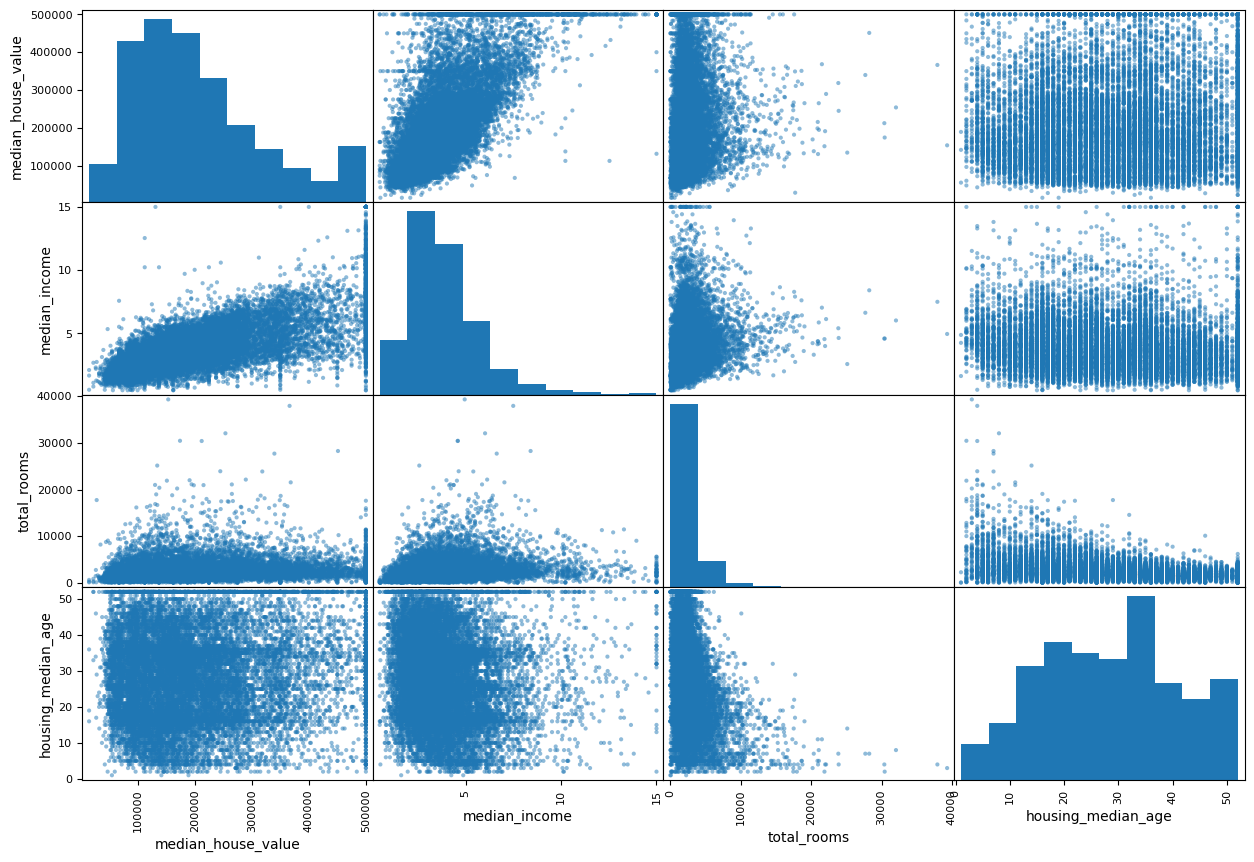

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_copy[attributes], figsize= (15,10))

In [23]:
#bakıldığında scatter matrix grafiğine bakıldığında medina_income ile house value arasında bir paralellik olduğu görülmektedir.
#diğer özellikler arasında bir paralellik yok gibi gözükmektedir.

<Axes: xlabel='median_income', ylabel='median_house_value'>

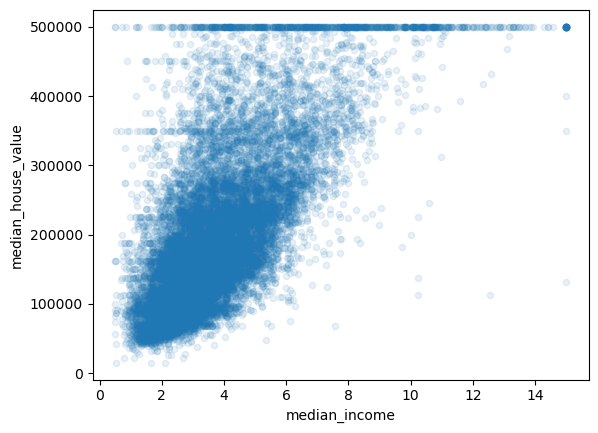

In [24]:
housing_copy.plot(kind= 'scatter', x= 'median_income', y= 'median_house_value', alpha= 0.1)

In [25]:
#öznitelik çıkarımı yapılacak. yeni özellikler oluşturulacak.
housing_copy['rooms_per_household'] = housing_copy['total_rooms'] / housing_copy['households']
housing_copy['bedrooms_per_room'] = housing_copy['total_bedrooms'] / housing_copy['total_rooms']
housing_copy['population_per_household'] = housing_copy['population'] / housing_copy['households']

#yeni özellikler oluşturulduktan sonra korelasyon matrisi tekrar hesaplanacak.
numeric_housing = housing_copy.select_dtypes(include=[np.number])
corr_matrix = numeric_housing.corr()
sorted_corr = corr_matrix['median_house_value'].sort_values(ascending=False)
sorted_corr

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [26]:
#yeni özellikler oluşturulduktan sonra korelasyon matrisi tekrar hesaplanmıştır.
#yeni özelliklerin house value ile korelasyonları incelendiğinde:
#bedrooms_per_room özelliği en güçlü korelasyona sahiptir.
#diğer özellikerin korelasyonları pek güçlü değildir.

In [27]:
#veri seti üzerinde eksik verilerin doldurulması gerekmektedir.
#total_bedrooms özelliğinde 207 adet eksik veri bulunmaktadır.
#bu eksik verilerin doldurulması gerekmektedir.


In [28]:

housing_copy['total_bedrooms'].fillna(housing_copy['total_bedrooms'].median(), inplace= True)
#total_bedrooms özelliğindeki eksik veriler median ile doldurulmuştur.



C:\Users\ebinm\AppData\Local\Temp\ipykernel_8668\2420922765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_copy['total_bedrooms'].fillna(housing_copy['total_bedrooms'].median(), inplace= True)


In [29]:
housing_copy['total_bedrooms'].isnull().sum()

0

In [30]:
housing_copy['ocean_proximity'].isnull().sum()

0

In [31]:
#metinsel yani kategorik değişkenlerin sayısal değerlere dönüştürülmesi gerekmektedir.

housing_copy['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

In [32]:
housing_category = housing_copy['ocean_proximity']
housing_category.head(10)


12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [33]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_encoded = ordinal_encoder.fit_transform(housing_category.values.reshape(-1,1)) #bu işlem ile kategorik değişkenler sayısal değerlere dönüştürülmüştür.
housing_encoded[:10] #bu işlem ile kategorik değişkenler sayısal değerlere dönüştürülmüştür.


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [34]:
"""yukarıda temel bir sorun var kategorik değişkenlerin kategorik değerleri tam olarak temsil edilmiyor.
yani ordinal encoder ile kategorik değişkenler sayısal değerlere dönüştürülmüştür.Fakat hangi sayısal 
değer hangi kategorik değeri temsil ediyor bilinmemektedir.ve dahası hangi değer okyanusa en yakındır bilinmemektedir.
bu nedenle one hot encoder kullanılmalıdır."""

'yukarıda temel bir sorun var kategorik değişkenlerin kategorik değerleri tam olarak temsil edilmiyor.\nyani ordinal encoder ile kategorik değişkenler sayısal değerlere dönüştürülmüştür.Fakat hangi sayısal \ndeğer hangi kategorik değeri temsil ediyor bilinmemektedir.ve dahası hangi değer okyanusa en yakındır bilinmemektedir.\nbu nedenle one hot encoder kullanılmalıdır.'

In [35]:
from sklearn.preprocessing import OneHotEncoder  #one hot encoder kullanılarak kategorik değişkenler sayısal değerlere dönüştürülmüştür.
cat_encoder = OneHotEncoder() #one hot encoder nesnesi oluşturuldu.
housing_1hot = cat_encoder.fit_transform(housing_category.values.reshape(-1,1)) #one hot encoder ile kategorik değişkenler sayısal değerlere dönüştürülmüştür.
housing_1hot #bu işlem ile kategorik değişkenler sayısal değerlere dönüştürülmüştür.
housing_1hot.toarray() #bu işlem ile kategorik değişkenler sayısal değerlere dönüştürülmüştür.

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [36]:
cat_encoder.categories_ #bu işlem ile kategorik değişkenlerin kategorik değerleri temsil edilmektedir.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin    #bu işlem ile özelleştirilmiş bir sınıf oluşturulmuştur.
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6    #bu işlem ile sayısal değişkenlerin indexleri belirlenmiştir.
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):     #bu işlem ile özelleştirilmiş bir sınıf oluşturulmuştur.
    def __init__(self, add_bedrooms_per_room = True):   #bu işlem ile sınıfın yapıcı metodu oluşturulmuştur.
        self.add_bedrooms_per_room = add_bedrooms_per_room  #bu işlem ile sınıfın yapıcı metodu oluşturulmuştur.
    def fit(self, X, y=None):    #bu işlem ile sınıfın fit metodu oluşturulmuştur.
        return self     #bu işlem ile sınıfın fit metodu oluşturulmuştur.
    def transform(self, X):  #bu işlem ile sınıfın transform metodu oluşturulmuştur.
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]      #bu işlem ile yeni bir özellik oluşturulmuştur.
        population_per_household = X[:, population_ix] / X[:, households_ix]    #bu işlem ile yeni bir özellik oluşturulmuştur.
        if self.add_bedrooms_per_room:   #bu işlem ile yeni bir özellik oluşturulmuştur.
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]  #bu işlem ile yeni bir özellik oluşturulmuştur.
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]       #bu işlem ile yeni bir özellik oluşturulmuştur.
        else:   #bu işlem ile yeni bir özellik oluşturulmuştur.
            return np.c_[X, rooms_per_household, population_per_household]  #bu işlem ile yeni bir özellik oluşturulmuştur.    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)        #bu işlem ile sınıfın nesnesi oluşturulmuştur.
housing_extra_attribs = attr_adder.transform(housing_copy.values)   #bu işlem ile yeni özellikler oluşturulmuştur.

from sklearn.pipeline import Pipeline   #bu işlem ile bir pipeline oluşturulmuştur.
from sklearn.preprocessing import StandardScaler    #bu işlem ile bir pipeline oluşturulmuştur.
from sklearn.impute import SimpleImputer   # eksik verilerin doldurulması için SimpleImputer import edilmiştir.
num_pipeline = Pipeline([   #bu işlem ile bir pipeline oluşturulmuştur.
    ('imputer', SimpleImputer(strategy="median")),  #bu işlem ile bir pipeline oluşturulmuştur.
    ('attribs_adder', CombinedAttributesAdder()),    #bu işlem ile bir pipeline oluşturulmuştur.
    ('std_scaler', StandardScaler()),   #bu işlem ile bir pipeline oluşturulmuştur.
])  #bu işlem ile bir pipeline oluşturulmuştur.  
housing_num_tr = num_pipeline.fit_transform(numeric_housing)    #bu işlem ile bir pipeline oluşturulmuştur.

from sklearn.compose import ColumnTransformer   #bu işlem ile bir pipeline oluşturulmuştur.
num_attribs = list(numeric_housing)     #bu işlem ile bir pipeline oluşturulmuştur.
cat_attribs = ['ocean_proximity']   #bu işlem ile bir pipeline oluşturulmuştur.
full_pipeline = ColumnTransformer([      #bu işlem ile bir pipeline oluşturulmuştur.
    ("num", num_pipeline, num_attribs),         #bu işlem ile bir pipeline oluşturulmuştur.
    ("cat", OneHotEncoder(), cat_attribs),      #bu işlem ile bir pipeline oluşturulmuştur.
])                                              #bu işlem ile bir pipeline oluşturulmuştur.
housing_prepared = full_pipeline.fit_transform(housing_copy)        #bu işlem ile bir pipeline oluşturulmuştur.


In [38]:
from sklearn.linear_model import LinearRegression   #bu işlem ile bir model oluşturulmuştur.
lin_reg = LinearRegression()    #bu işlem ile bir model oluşturulmuştur.    
lin_reg.fit(housing_prepared, housing_copy['median_house_value'])    #bu işlem ile bir model oluşturulmuştur.   
some_data = housing.iloc[:5]    #bu işlem ile bir model oluşturulmuştur.
some_labels = housing_copy.iloc[:5]    #bu işlem ile bir model oluşturulmuştur.

# Add the new attributes to some_data
some_data['rooms_per_household'] = some_data['total_rooms'] / some_data['households']
some_data['bedrooms_per_room'] = some_data['total_bedrooms'] / some_data['total_rooms']
some_data['population_per_household'] = some_data['population'] / some_data['households']

some_data_prepared = full_pipeline.transform(some_data)    #bu işlem ile bir model oluşturulmuştur.
print("Predictions:", lin_reg.predict(some_data_prepared))    #bu işlem ile bir model oluşturulmuştur.
print("Labels:", list(some_labels['median_house_value']))    #bu işlem ile bir model oluşturulmuştur.


Predictions: [452600. 358500. 352100. 341300. 342200.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


C:\Users\ebinm\AppData\Local\Temp\ipykernel_8668\4098910634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  some_data['rooms_per_household'] = some_data['total_rooms'] / some_data['households']
C:\Users\ebinm\AppData\Local\Temp\ipykernel_8668\4098910634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  some_data['bedrooms_per_room'] = some_data['total_bedrooms'] / some_data['total_rooms']
C:\Users\ebinm\AppData\Local\Temp\ipykernel_8668\4098910634.py:10: SettingWithCopyWarning: 
A value is trying to b

In [39]:
from sklearn.metrics import mean_squared_error    #bu işlem ile bir model oluşturulmuştur.
housing_predictions = lin_reg.predict(housing_prepared)    #bu işlem ile bir model oluşturulmuştur.
lin_mse = mean_squared_error(housing_copy['median_house_value'], housing_predictions)    #bu işlem ile bir model oluşturulmuştur.
lin_rmse = np.sqrt(lin_mse)    #bu işlem ile bir model oluşturulmuştur.
lin_rmse    #bu işlem ile bir model oluşturulmuştur.


2.3360934114986185e-10

In [40]:
from sklearn.tree import DecisionTreeRegressor    #bu işlem ile bir model oluşturulmuştur.
tree_reg = DecisionTreeRegressor()    #bu işlem ile bir model oluşturulmuştur.
tree_reg.fit(housing_prepared, housing_copy['median_house_value'])    #bu işlem ile bir model oluşturulmuştur.
housing_predictions = tree_reg.predict(housing_prepared)    #bu işlem ile bir model oluşturulmuştur.
tree_mse = mean_squared_error(housing_copy['median_house_value'], housing_predictions)    #bu işlem ile bir model oluşturulmuştur.
tree_rmse = np.sqrt(tree_mse)    #bu işlem ile bir model oluşturulmuştur.
tree_rmse    #bu işlem ile bir model oluşturulmuştur.


0.0

In [41]:
from sklearn.model_selection import cross_val_score    #bu işlem ile bir model oluşturulmuştur.
scores = cross_val_score(tree_reg, housing_prepared, housing_copy['median_house_value'], scoring="neg_mean_squared_error", cv=10)    #bu işlem ile bir model oluşturulmuştur.
tree_rmse_scores = np.sqrt(-scores)    #bu işlem ile bir model oluşturulmuştur.
def display_scores(scores):    #bu işlem ile bir model oluşturulmuştur.
    print("Scores:", scores)    #bu işlem ile bir model oluşturulmuştur.
    print("Mean:", scores.mean())    #bu işlem ile bir model oluşturulmuştur.
    print("Standard deviation:", scores.std())    #bu işlem ile bir model oluşturulmuştur.
display_scores(tree_rmse_scores)    #bu işlem ile bir model oluşturulmuştur.

Scores: [ 98.16722403  94.13811912 218.48273671 130.36778799 202.95366065
 221.16234024 111.07644657 125.99693304  78.60072452  84.11004876]
Mean: 136.50560216294565
Standard deviation: 53.34811049828779


In [42]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_copy['median_house_value'], scoring="neg_mean_squared_error", cv=10)    #bu işlem ile bir model oluşturulmuştur.
lin_rmse_scores = np.sqrt(-lin_scores)    #bu işlem ile bir model oluşturulmuştur.
display_scores(lin_rmse_scores)    #bu işlem ile bir model oluşturulmuştur. deviation: anlamı sapma

Scores: [5.69350909e-10 1.94038786e-10 1.75933554e-10 2.84227582e-10
 2.36542327e-10 5.50752528e-10 3.54518620e-10 2.28623052e-10
 2.01980769e-10 1.55505200e-10]
Mean: 2.9514733258677406e-10
Standard deviation: 1.430526586533698e-10


In [46]:
#random forest regresyon modeli ile veri setini tekrar modellersek;
from sklearn.ensemble import RandomForestRegressor    #bu işlem ile bir model oluşturulmuştur.
forest_reg = RandomForestRegressor()    #bu işlem ile bir model oluşturulmuştur.    
forest_reg.fit(housing_prepared, housing_copy['median_house_value'])    #bu işlem ile bir model oluşturulmuştur.
housing_predictions = forest_reg.predict(housing_prepared)    #bu işlem ile bir model oluşturulmuştur.
forest_mse = mean_squared_error(housing_copy['median_house_value'], housing_predictions)    #bu işlem ile bir model oluşturulmuştur.
forest_rmse = np.sqrt(forest_mse)    #bu işlem ile bir model oluşturulmuştur.
forest_rmse    #bu işlem ile bir model oluşturulmuştur.

# Cross-validation scores for RandomForestRegressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_copy['median_house_value'], scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)    #bu işlem ile bir model oluşturulmuştur.

Scores: [ 52.13506045  50.14074235  90.4649831  246.59957254  60.80226797
  82.32585415  76.14459612  52.80957207  44.91627584 120.1570087 ]
Mean: 87.64959332983398
Standard deviation: 57.37543015594009


In [47]:
 # Grid Search ile en iyi hiperparametreleri bulma
from sklearn.model_selection import GridSearchCV    #bu işlem ile bir model oluşturulmuştur.
param_grid = [    #bu işlem ile bir model oluşturulmuştur.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},    #bu işlem ile bir model oluşturulmuştur.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},    #bu işlem ile bir model oluşturulmuştur.
]    #bu işlem ile bir model oluşturulmuştur.
forest_reg = RandomForestRegressor()    #bu işlem ile bir model oluşturulmuştur.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)    #bu işlem ile bir model oluşturulmuştur. 
grid_search.fit(housing_prepared, housing_copy['median_house_value'])    #bu işlem ile bir model oluşturulmuştur.
grid_search.best_params_    #bu işlem ile bir model oluşturulmuştur.
grid_search.best_estimator_    #bu işlem ile bir model oluşturulmuştur.

RandomForestRegressor(max_features=8, n_estimators=30)

In [49]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features=6, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=30,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)

cvres = grid_search.cv_results_    #bu işlem ile bir model oluşturulmuştur.
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):    #bu işlem ile bir model oluşturulmuştur.
    print(np.sqrt(-mean_score), params)    #bu işlem ile bir model oluşturulmuştur. 

39692.440911345715 {'max_features': 2, 'n_estimators': 3}
29684.064717709487 {'max_features': 2, 'n_estimators': 10}
25864.069535228857 {'max_features': 2, 'n_estimators': 30}
23887.943254600545 {'max_features': 4, 'n_estimators': 3}
17033.00604090486 {'max_features': 4, 'n_estimators': 10}
13829.528610564832 {'max_features': 4, 'n_estimators': 30}
15393.114229538156 {'max_features': 6, 'n_estimators': 3}
9046.661668472361 {'max_features': 6, 'n_estimators': 10}
6869.763471287804 {'max_features': 6, 'n_estimators': 30}
8330.65425883569 {'max_features': 8, 'n_estimators': 3}
5620.837504201681 {'max_features': 8, 'n_estimators': 10}
4299.118275009525 {'max_features': 8, 'n_estimators': 30}
39223.236862800935 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
25694.416413085833 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
30784.89230498218 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
19207.70062435619 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [ ]:
#Feature Importance her bir özelliğin model üzerindeki etkisini , önemini gösterir.
feature_importances = grid_search.best_estimator_.feature_importances_    #bu işlem ile bir model oluşturulmuştur.
feature_importances    #bu işlem ile bir model oluşturulmuştur.

array([3.72500276e-03, 7.82976727e-03, 2.72594999e-03, 1.46483727e-03,
       7.56994402e-04, 8.87886583e-04, 9.46034044e-04, 1.21639626e-01,
       7.23617389e-01, 1.99662394e-03, 2.32382855e-02, 1.16656930e-02,
       7.33903438e-03, 8.64452253e-03, 8.90097245e-03, 3.63313456e-03,
       7.02003973e-02, 1.14359836e-12, 5.63036241e-04, 2.24813039e-04])

In [51]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]    #bu işlem ile bir model oluşturulmuştur.
cat_encoder = full_pipeline.named_transformers_["cat"]    #bu işlem ile bir model oluşturulmuştur.
cat_one_hot_attribs = list(cat_encoder.categories_[0])    #bu işlem ile bir model oluşturulmuştur.
attributes = num_attribs + extra_attribs + cat_one_hot_attribs    #bu işlem ile bir model oluşturulmuştur.
sorted(zip(feature_importances, attributes), reverse=True)    #bu işlem ile bir model oluşturulmuştur.


[(0.7236173888017937, 'median_house_value'),
 (0.12163962590947636, 'median_income'),
 (0.07020039728118783, 'INLAND'),
 (0.023238285548292804, 'bedrooms_per_room'),
 (0.01166569299767755, 'population_per_household'),
 (0.008900972448160342, 'bedrooms_per_room'),
 (0.008644522534455346, 'pop_per_hhold'),
 (0.007829767271431035, 'latitude'),
 (0.00733903437632758, 'rooms_per_hhold'),
 (0.003725002760665206, 'longitude'),
 (0.0036331345560970426, '<1H OCEAN'),
 (0.00272594999031965, 'housing_median_age'),
 (0.001996623944949736, 'rooms_per_household'),
 (0.0014648372677747191, 'total_rooms'),
 (0.0009460340443459652, 'households'),
 (0.0008878865831417293, 'population'),
 (0.0007569944023924526, 'total_bedrooms'),
 (0.000563036241146448, 'NEAR BAY'),
 (0.00022481303922097093, 'NEAR OCEAN'),
 (1.1435983621732725e-12, 'ISLAND')]

In [60]:
""" 
burada özelliklerin önem sırasına göre sıralanmıştır.
bununla bazı özelliklerin model üzerinde daha fazla etkisi olduğu görülmektedir.
örneğin medina_income özelliği model üzerinde en fazla etkiye sahiptir.
diğer özelliklerin etkisi ise pek fazla değildir ve bunlar atılabilir istenirse.
 """

' \nburada özelliklerin önem sırasına göre sıralanmıştır.\nbununla bazı özelliklerin model üzerinde daha fazla etkisi olduğu görülmektedir.\nörneğin medina_income özelliği model üzerinde en fazla etkiye sahiptir.\ndiğer özelliklerin etkisi ise pek fazla değildir ve bunlar atılabilir istenirse.\n '

In [67]:
# Test veri setindeki sütunları kontrol et
print("X_test sütunları:", X_test.columns)
print("Pipeline tarafından beklenen sütunlar:", full_pipeline.feature_names_in_)

# Eksik sütunları belirle ve doldur
missing_cols = set(full_pipeline.feature_names_in_) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Eksik sütunları doldur

# Veri dönüşümünü gerçekleştir
X_test_prepared = full_pipeline.transform(X_test)

# Model ile tahmin yap
final_predictions = final_model.predict(X_test_prepared)

# Hata hesapla
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse


X_test sütunları: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')
Pipeline tarafından beklenen sütunlar: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'ocean_proximity' 'income_cat' 'rooms_per_household'
 'bedrooms_per_room' 'population_per_household']


157887.3608956021